[Reference](https://blog.stackademic.com/two-legs-one-problem-an-intuitive-guide-to-multicollinearity-ea2e14636c3f)

In [1]:
import numpy as np
import pandas as pd

np.random.seed(909)  # for reproducibility

N = 100  # number of individuals

# Simulate total heights from a normal distribution (mean=10, sd=2)
height = np.random.normal(10, 2, N)

# Each individual has legs about 40-50% of their height
leg_prop = np.random.uniform(0.4, 0.5, N)

# Add small random noise so left/right legs differ slightly
leg_left = leg_prop * height + np.random.normal(0, 0.02, N)
leg_right = leg_prop * height + np.random.normal(0, 0.02, N)

# Create a DataFrame
data = pd.DataFrame({
    'height': height,
    'leg_left': leg_left,
    'leg_right': leg_right
})

data.head()

,height,leg_left,leg_right
0,8.463728,4.094675,4.078446
1,9.854070,4.776475,4.687749
2,8.668694,4.192607,4.256472
3,7.523768,3.088674,3.088206
4,9.381352,4.093217,4.048181


In [2]:
import statsmodels.api as sm

X = data[['leg_left', 'leg_right']]
X = sm.add_constant(X)  # Adds intercept term
y = data['height']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     432.3
Date:                Wed, 14 May 2025   Prob (F-statistic):           4.81e-49
Time:                        12:53:41   Log-Likelihood:                -97.906
No. Observations:                 100   AIC:                             201.8
Df Residuals:                      97   BIC:                             209.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9537      0.331      2.879      0.0

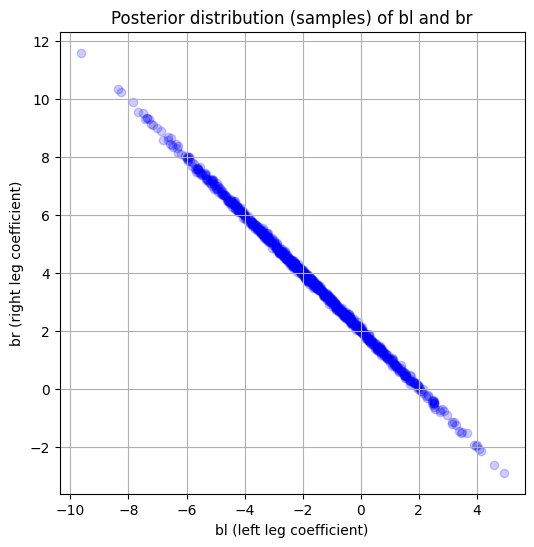

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get posterior-like samples using model covariance
params = np.random.multivariate_normal(
    model.params,
    model.cov_params(),
    size=1000
)

bl_samples = params[:, 1]  # leg_left coefficient samples
br_samples = params[:, 2]  # leg_right coefficient samples

# Plotting the highly correlated parameters
plt.figure(figsize=(6,6))
plt.scatter(bl_samples, br_samples, alpha=0.2, color='blue')
plt.xlabel('bl (left leg coefficient)')
plt.ylabel('br (right leg coefficient)')
plt.title('Posterior distribution (samples) of bl and br')
plt.grid(True)
plt.show()

In [4]:
X_single = data[['leg_left']]
X_single = sm.add_constant(X_single)

model_single = sm.OLS(y, X_single).fit()
print(model_single.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     844.2
Date:                Wed, 14 May 2025   Prob (F-statistic):           5.83e-50
Time:                        12:53:53   Log-Likelihood:                -99.440
No. Observations:                 100   AIC:                             202.9
Df Residuals:                      98   BIC:                             208.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8251      0.326      2.530      0.0

<ipython-input-5-a92c806598a2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sum_blbr, shade=True, color='purple')


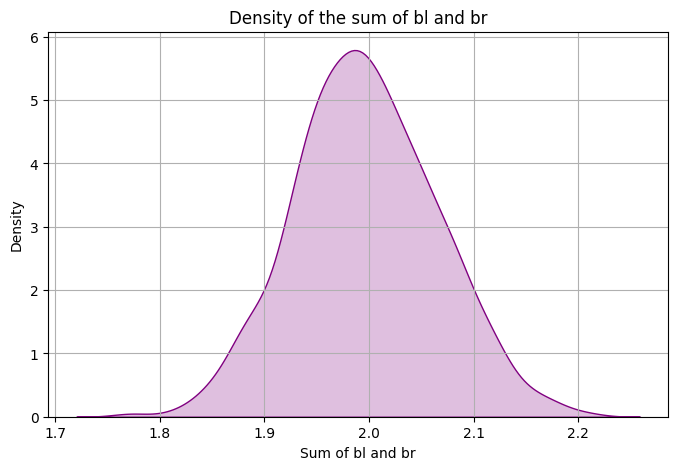

Mean of sum: 2.00


In [5]:
sum_blbr = bl_samples + br_samples

plt.figure(figsize=(8,5))
sns.kdeplot(sum_blbr, shade=True, color='purple')
plt.title('Density of the sum of bl and br')
plt.xlabel('Sum of bl and br')
plt.ylabel('Density')
plt.grid(True)
plt.show()

print(f"Mean of sum: {np.mean(sum_blbr):.2f}")

# Mean of sum: 2.00